In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv('city_temperature.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128803 entries, 0 to 128802
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          128803 non-null  object 
 1   Country         128803 non-null  object 
 2   State           0 non-null       float64
 3   City            128803 non-null  object 
 4   Month           128802 non-null  float64
 5   Day             128802 non-null  float64
 6   Year            128802 non-null  float64
 7   AvgTemperature  128802 non-null  float64
dtypes: float64(5), object(3)
memory usage: 7.9+ MB


In [6]:
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1.0,1.0,1995.0,64.2
1,Africa,Algeria,NaN,Algiers,1.0,2.0,1995.0,49.4
2,Africa,Algeria,NaN,Algiers,1.0,3.0,1995.0,48.8
3,Africa,Algeria,NaN,Algiers,1.0,4.0,1995.0,46.4
4,Africa,Algeria,NaN,Algiers,1.0,5.0,1995.0,47.9


In [7]:
df.describe(include='all')

,Region,Country,State,City,Month,Day,Year,AvgTemperature
count,128803,128803,0.0,128803,128802.000000,128802.000000,128802.000000,128802.000000
unique,1,15,NaN,16,NaN,NaN,NaN,NaN
top,Africa,Ethiopia,NaN,Addis Ababa,NaN,NaN,NaN,NaN
freq,128803,9295,NaN,9295,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,6.467920,15.717349,2005.913891,51.454435
std,NaN,NaN,NaN,NaN,3.459035,8.801271,39.005685,59.247953
min,NaN,NaN,NaN,NaN,1.000000,0.000000,201.000000,-99.000000
25%,NaN,NaN,NaN,NaN,3.000000,8.000000,2000.000000,61.800000
50%,NaN,NaN,NaN,NaN,6.000000,16.000000,2006.000000,76.100000
75%,NaN,NaN,NaN,NaN,9.000000,23.000000,2013.000000,80.700000


In [8]:
print(df['AvgTemperature'].min())   # this temprature is not exist in the world (or not recorded)
print(df['AvgTemperature'].max())   # this temprature is not exist in the world (or not recorded)

-99.0
100.2


In [9]:
df = df[(df['AvgTemperature'] >= -89.2) & (df['AvgTemperature'] <= 56.7)]
df['AvgTemperature']

,AvgTemperature
1,49.4
2,48.8
3,46.4
4,47.9
5,48.7
...,...
128547,56.7
128563,55.5
128564,55.6
128633,54.1


In [10]:
df['AvgTemperature'].min()

33.3

In [11]:
df['AvgTemperature'].max()

56.7

# **These statistical measures help us summarize and understand the temperature dataset:**

 - Mean shows the average climate condition.

 - Median is robust against extreme events.

 - Mode shows the most frequent temperature.

 - Standard deviation measures climate stability.

 - Z-score helps detect extreme, possibly erroneous temperature readings.

In [12]:
from statistics import mode

mean_temp = df['AvgTemperature'].mean()
median_temp = df['AvgTemperature'].median()
try:
    mode_temp = mode(df['AvgTemperature'])
except:
    mode_temp = "No unique mode"

std_temp = df['AvgTemperature'].std()

print(f"Mean: {mean_temp} I think it is not normal but if we assume the mode is 55.9 degree... it maybe normal :D")
print(f"Median: {median_temp}")
print(f"Mode: {mode_temp}")
print(f"Standard Deviation: {std_temp} bro, I understand that you faced a problem like ""what is standartd deviation... it measures how spread out the temprature is from the mean.")

Mean: 52.663634881825594 I think it is not normal but if we assume the mode is 55.9 degree... it maybe normal :D
Median: 53.4
Mode: 56.5
Standard Deviation: 3.3562888850977286 bro, I understand that you faced a problem like what is standartd deviation... it measures how spread out the temprature is from the mean.


In [13]:
from scipy import stats
import numpy as np

df['Z_Score'] = stats.zscore(df['AvgTemperature'])
outliers = df[np.abs(df['Z_Score']) > 3]
print(outliers.head())

      Region  Country  State     City  Month   Day    Year  AvgTemperature  \
417   Africa  Algeria    NaN  Algiers    2.0  22.0  1996.0            42.3   
1058  Africa  Algeria    NaN  Algiers   11.0  24.0  1997.0            42.4   
1492  Africa  Algeria    NaN  Algiers    2.0   1.0  1999.0            37.8   
1493  Africa  Algeria    NaN  Algiers    2.0   2.0  1999.0            41.8   
1494  Africa  Algeria    NaN  Algiers    2.0   3.0  1999.0            41.6   

       Z_Score  
417  -3.088077  
1058 -3.058280  
1492 -4.428953  
1493 -3.237064  
1494 -3.296658  


In [14]:
normal_data = df[np.abs(df['Z_Score']) <= 3]
normal_data

,Region,Country,State,City,Month,Day,Year,AvgTemperature,Z_Score
1,Africa,Algeria,NaN,Algiers,1.0,2.0,1995.0,49.4,-0.972473
2,Africa,Algeria,NaN,Algiers,1.0,3.0,1995.0,48.8,-1.151257
3,Africa,Algeria,NaN,Algiers,1.0,4.0,1995.0,46.4,-1.866390
4,Africa,Algeria,NaN,Algiers,1.0,5.0,1995.0,47.9,-1.419432
5,Africa,Algeria,NaN,Algiers,1.0,6.0,1995.0,48.7,-1.181054
...,...,...,...,...,...,...,...,...,...
128547,Africa,Madagascar,NaN,Antananarivo,7.0,22.0,2009.0,56.7,1.202725
128563,Africa,Madagascar,NaN,Antananarivo,8.0,7.0,2009.0,55.5,0.845159
128564,Africa,Madagascar,NaN,Antananarivo,8.0,8.0,2009.0,55.6,0.874956
128633,Africa,Madagascar,NaN,Antananarivo,10.0,16.0,2009.0,54.1,0.427997


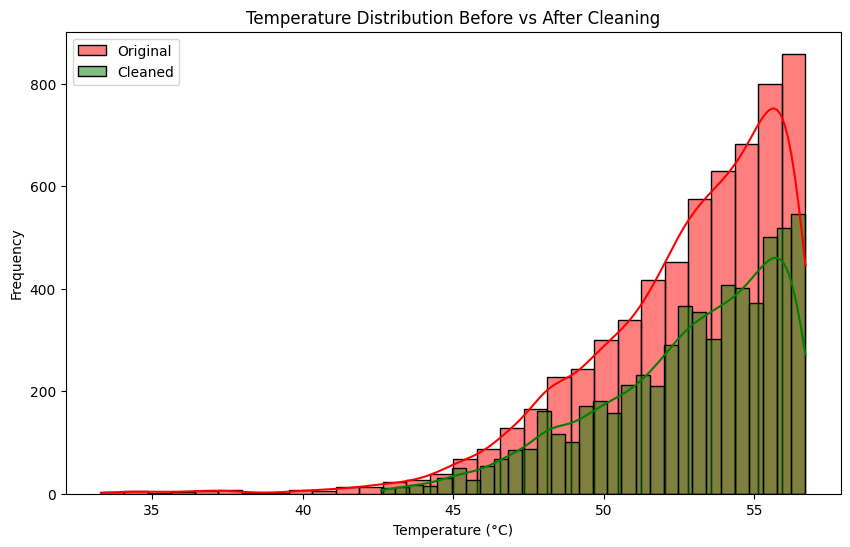

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))

sns.histplot(df['AvgTemperature'], bins=30, kde=True, color='red', label='Original', alpha=0.5)

sns.histplot(normal_data['AvgTemperature'], bins=30, kde=True, color='green', label='Cleaned', alpha=0.5)

plt.title("Temperature Distribution Before vs After Cleaning")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.show()